In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("Language Detection.csv")
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [3]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
X = data["Text"]
y = data["Language"]

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [11]:
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)
# Accuracy is : 0.9772727272727273

Accuracy is : 0.9763056092843327


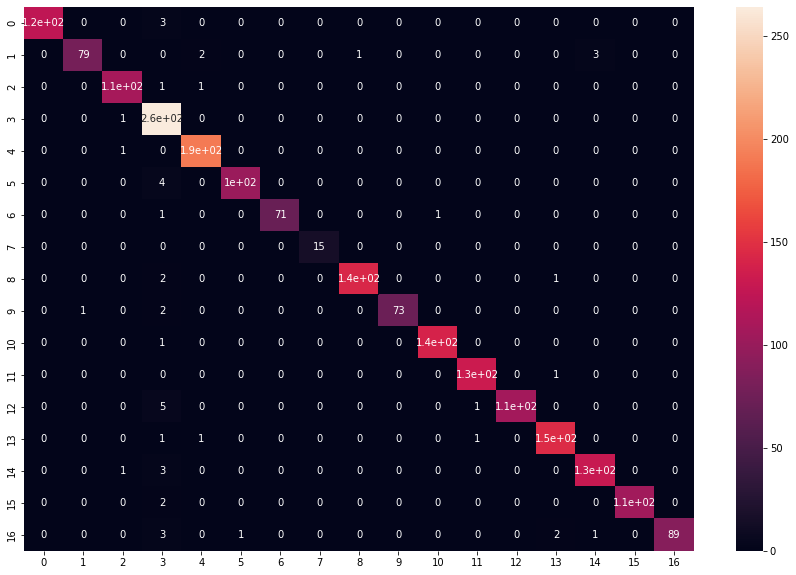

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [14]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [29]:
# English
predict("Gokul Ananth provides a community based knowledge portal for Analytics and Data Science professionals")

The langauge is in English


In [30]:
# French
predict("Gokul Ananth fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")

The langauge is in French


In [31]:
# Arabic
predict("توفر Gokul Ananth بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")

The langauge is in Arabic


In [23]:
# Tamil
predict("தமிழ்")

The langauge is in Tamil


In [32]:
# Spanish
predict("Gokul Ananth proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.")

The langauge is in Spanish


In [26]:
# Malayalam
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

The langauge is in Malayalam


In [33]:
# Russian
predict("Gokul Ananth - это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")

The langauge is in Russian
